## American Signs

### libiraries 

In [49]:
import math 
import numpy as np 
import pandas as pd 
import tensorflow as tf
import matplotlib.pyplot as plt
import sklearn 
import os 
import h5py
from matplotlib.pyplot import imread 
import tensorflow.keras.layers as tfl 
from tensorflow.python.framework import ops
from tensorflow.keras.layers import Dense,Dropout,Conv2D,MaxPooling2D,Flatten ,Add
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
import os 
import zipfile 
from glob import glob
from PIL import Image
import cv2
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.callbacks import EarlyStopping




### Load the data and splitting them

In [2]:
with zipfile.ZipFile("archive (8).zip",'r') as zip_ref:
    zip_ref.extractall('data')

##### X

In [2]:
x=glob("data/asl_alphabet_train/asl_alphabet_train/*/*.jpg")


In [18]:
img_read=[]
for i in range (0,len(x)):
    img_read.append(plt.imread(x[i]))

In [20]:
x=np.array(img_read)

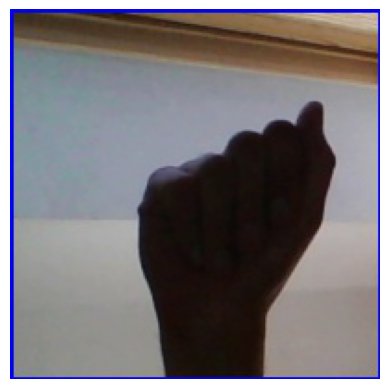

In [23]:
# Showing an image
plt.imshow(x[2])
plt.axis('off')
plt.show()

#### Y

In [11]:
Alphabits=os.listdir('data/asl_alphabet_train/asl_alphabet_train')

In [40]:
y=[]
for i in range (0,29):
   for j in range (0,3000):
     y.append(Alphabits[i])
y=np.array(y)

### Splitting Data

In [69]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1, random_state=42)

In [73]:
encoder=OneHotEncoder(sparse_output=False,categories='auto')
x_train=x_train[0:4000]/255
x_test=x_test[0:1000]/255
Y_train = encoder.fit_transform(y_train[0:4000].reshape(-1, 1))
Y_test = encoder.transform(y_test[0:1000].reshape(-1, 1))

In [74]:
x_train.shape

(4000, 200, 200, 3)

In [75]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)),
    MaxPooling2D((2, 2)), 
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),   

    Flatten(),
    
    Dense(128, activation='relu'),
    Dropout(0.5),  
    

    Dense(29, activation='softmax')])

In [76]:
model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [77]:
print("x_train shape:", x_train.shape)
print("Y_train shape:", Y_train.shape)
print("x_train data type:", x_train.dtype)
print("x_test data type:", x_test.dtype)
x_train = x_train.astype('float32') 
x_test = x_test.astype('float32')

x_train shape: (4000, 200, 200, 3)
Y_train shape: (4000, 29)
x_train data type: float64
x_test data type: float64


In [78]:
early_stopping=EarlyStopping(monitor='val_loss',patience=30,restore_best_weights=True)
history = model.fit(x_train, Y_train, batch_size=32, epochs=50, validation_data=(x_test, Y_test), callbacks=[early_stopping])

Epoch 1/50
125/125 [==============================] - 46s 360ms/step - loss: 3.4415 - accuracy: 0.0745 - val_loss: 2.9169 - val_accuracy: 0.2160
Epoch 2/50
125/125 [==============================] - 45s 358ms/step - loss: 2.5814 - accuracy: 0.2612 - val_loss: 2.0807 - val_accuracy: 0.4220
Epoch 3/50
125/125 [==============================] - 44s 349ms/step - loss: 1.8556 - accuracy: 0.4392 - val_loss: 1.6345 - val_accuracy: 0.5400
Epoch 4/50
125/125 [==============================] - 44s 350ms/step - loss: 1.3456 - accuracy: 0.5828 - val_loss: 1.3126 - val_accuracy: 0.6110
Epoch 5/50
125/125 [==============================] - 43s 345ms/step - loss: 1.0487 - accuracy: 0.6670 - val_loss: 1.2235 - val_accuracy: 0.6150
Epoch 6/50
125/125 [==============================] - 42s 339ms/step - loss: 0.8236 - accuracy: 0.7330 - val_loss: 1.2255 - val_accuracy: 0.6410
Epoch 7/50
125/125 [==============================] - 44s 351ms/step - loss: 0.6667 - accuracy: 0.7793 - val_loss: 1.1491 - val_ac

C:\Users\DELL\AppData\Local\Temp\ipykernel_17444\974158325.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_17444\974158325.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)


[Text(0.5, 0, 'Epoch'), Text(0, 0.5, 'Accuracy')]

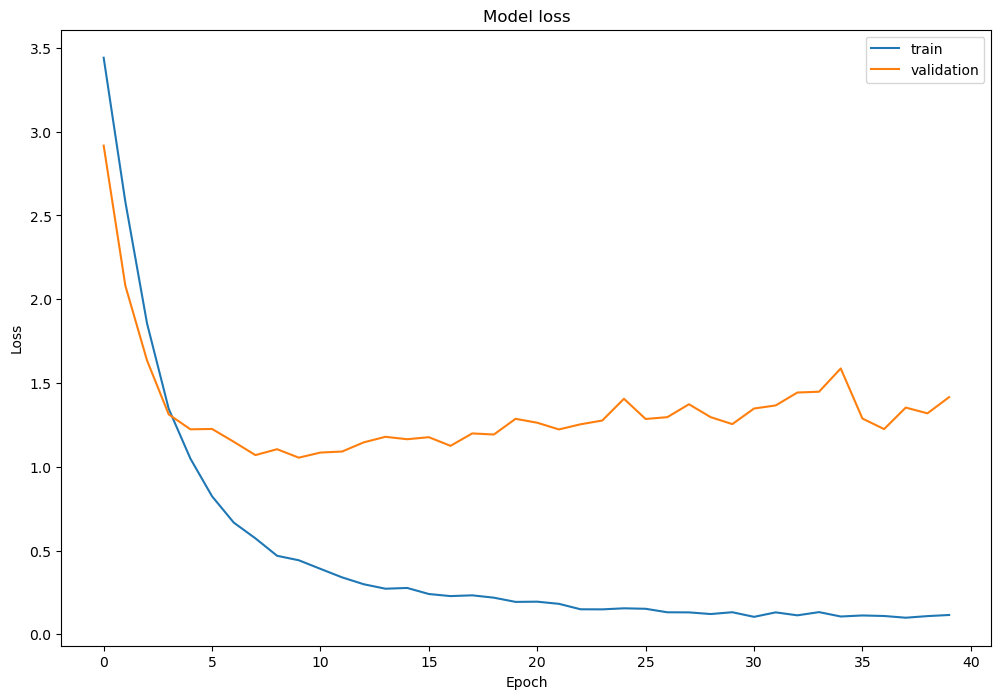

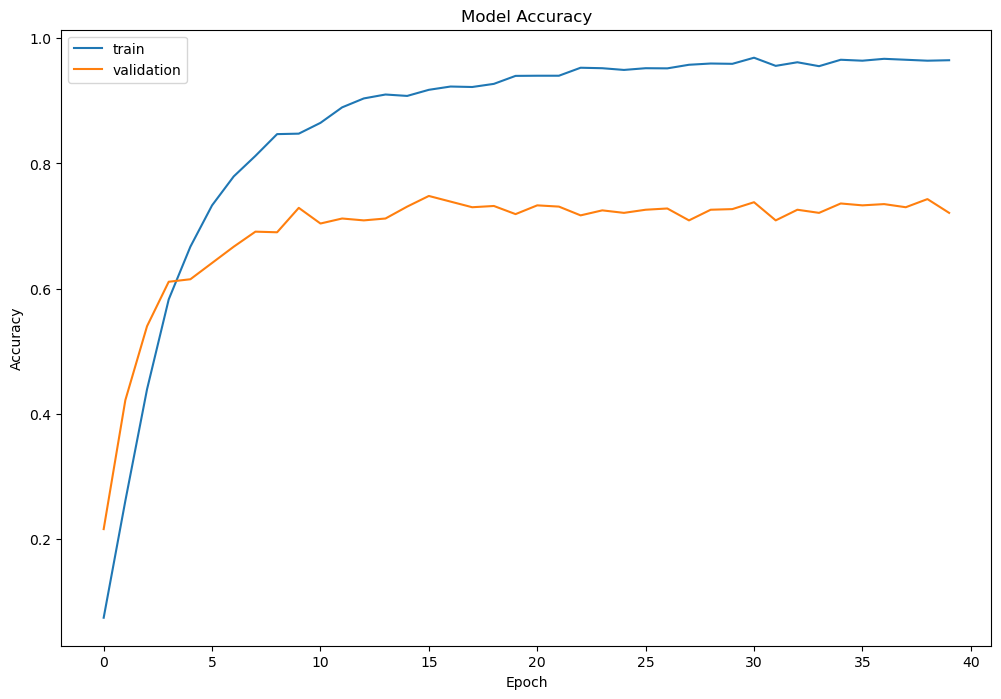

In [80]:
df_loss_acc = pd.DataFrame(history.history)
df_loss= df_loss_acc[['loss','val_loss']]
df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
df_acc= df_loss_acc[['accuracy','val_accuracy']]
df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)
df_loss.plot(title='Model loss',figsize=(12,8)).set(xlabel='Epoch',ylabel='Loss')
df_acc.plot(title='Model Accuracy',figsize=(12,8)).set(xlabel='Epoch',ylabel='Accuracy')